In [1]:
import base64
import requests
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from ast import literal_eval

In [2]:
def decode_prediction(pred):
    mask = np.zeros((pred.shape[0], pred.shape[0]))

    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):

            mask[i,j] = np.argmax(pred[i,j,:])

    return mask

In [3]:
image_path = './data/504.png'
uri = 'http://880c00d6-8d90-43c7-a1da-84059e8a5071.eastus.azurecontainer.io/score'

In [4]:
files = {'image': open(image_path, 'rb').read()}

In [5]:
response = requests.post(uri, files=files)

In [6]:
print(response.json)

<bound method Response.json of <Response [200]>>


In [9]:
mask = decode_prediction(np.asarray(literal_eval(response.text)[0]))

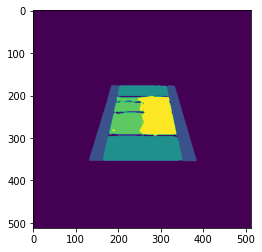

In [10]:
plt.imshow(mask)